<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Snakemake-SM-run" data-toc-modified-id="Snakemake-SM-run-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Snakemake-SM run</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Communites" data-toc-modified-id="Communites-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Communites</a></span><ul class="toc-item"><li><span><a href="#n100_r30" data-toc-modified-id="n100_r30-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>n100_r30</a></span></li></ul></li><li><span><a href="#Estimated-coverage" data-toc-modified-id="Estimated-coverage-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Estimated coverage</a></span></li><li><span><a href="#Feature-tables" data-toc-modified-id="Feature-tables-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature tables</a></span><ul class="toc-item"><li><span><a href="#n100_r30" data-toc-modified-id="n100_r30-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>n100_r30</a></span><ul class="toc-item"><li><span><a href="#Number-of-contigs" data-toc-modified-id="Number-of-contigs-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Number of contigs</a></span></li><li><span><a href="#Misassembly-types" data-toc-modified-id="Misassembly-types-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Misassembly types</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* evaluate the results of the test dataset generation
* 2nd run, which include `VALET` 

# Var

In [3]:
# location of all training dataset runs
work_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs/'
# 100 ref genomes, 30 metagenomes 
n100_r30_dir = file.path(work_dir, 'n100_r30')


# input genome table
test_n100_ref_file = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/GTDB_ref_genomes/DeepMAsED_GTDB_genome-refs_test_n100.tsv'


# Init

In [6]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)

source('/ebio/abt3_projects/software/dev/DeepMAsED/bin/misc_r_functions/init.R')

In [5]:
#' "cat {file}" in R
cat_file = function(file_name){
    cmd = paste('cat', file_name, collapse=' ')
    system(cmd, intern=TRUE) %>% paste(collapse='\n') %>% cat
}

# Snakemake-SM run

## Config

In [7]:
cat_file(file.path(n100_r30_dir, 'config.yaml'))

# Input
genomes_file: /ebio/abt3_projects/databases_no-backup/DeepMAsED/GTDB_ref_genomes/DeepMAsED_GTDB_genome-refs_test_n100.tsv

# Output location
output_dir: /ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs/n100_r30/


# software parameters
# Use "Skip" to skip  steps. If no params for rule, use ""
params:
  # simulating metagenomes
  reps: 30
  MGSIM:
    genome_download: ""
    communities: --richness 1
    reads: --sr-seq-depth 1e6 --art-paired --art-mflen 250
  # coverage
  nonpareil: -T kmer
  nonpareil_summary: 1e9   # this is target seq. depth  
  # assemblying metagenomes
  assemblers:
    metaspades: -k auto --only-assembler
    megahit: --min-count 3 --min-contig-len 1000 --presets meta-sensitive
    idba_ud: Skip #--mink 20 --maxk 100
    ray: Skip 
  # assembly filtering
  contig_length_cutoff: 1000       # length in bp 
  # assessing assembly errors
  minimap2: ""
  metaquast: --min-identity 95 --extensive-mis-size 100 --no-icarus --max-ref-number 0
  # mappi

## Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/databases_no-backup/bin/deepmased/DeepMAsED-SM

screen -L -S DM-test-n100-redo ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs/n100_r30/config.yaml cluster.json /ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs/n100_r30/SGE_log 16
```


# Communites

* Simulated abundances of each ref genome

## n100_r30

In [7]:
comm_files = list.files(file.path(n100_r30_dir, 'MGSIM'), 'comm_wAbund.txt', full.names=TRUE, recursive=TRUE)
comm_files %>% length %>% print
comm_files %>% head

[1] 30


[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/MGSIM/1/comm_wAbund.txt" 
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/MGSIM/10/comm_wAbund.txt"
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/MGSIM/11/comm_wAbund.txt"
[4] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/MGSIM/12/comm_wAbund.txt"
[5] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/MGSIM/13/comm_wAbund.txt"
[6] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/MGSIM/14/comm_wAbund.txt"

In [8]:
comms = list()
for(F in comm_files){
    df = read.delim(F, sep='\t')
    df$Rep = basename(dirname(F))
    comms[[F]] = df
}
comms = do.call(rbind, comms)
rownames(comms) = 1:nrow(comms)
comms %>% dfhead

[1] 2970    5


Community,Taxon,Perc_rel_abund,Rank,Rep
1,RS_GCF_000378225_1_Methylophilus_methylotrophus_DSM_46235_ATCC_53528,16.733938,1,1
1,RS_GCF_900100825_1_Agrobacterium_sp_DSM_25558,10.253782,2,1
1,RS_GCF_002246015_1_Nostoc_sp_Peltigera_membranacea_cyanobiont_210A,6.494903,3,1


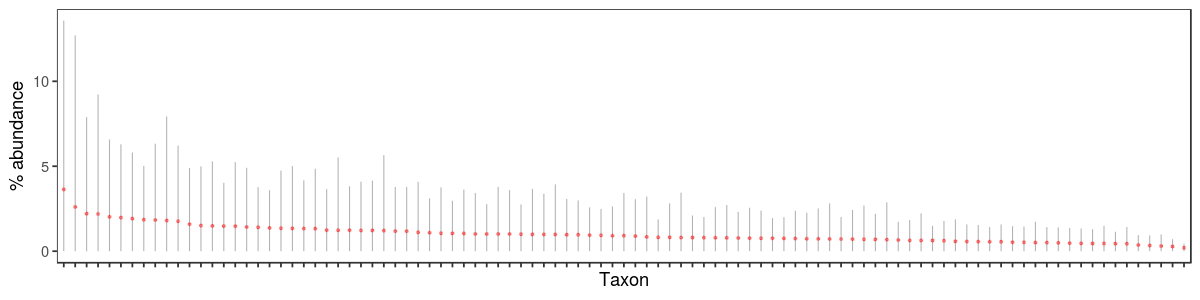

In [9]:
p = comms %>%
    mutate(Perc_rel_abund = ifelse(Perc_rel_abund == 0, 1e-5, Perc_rel_abund)) %>%
    group_by(Taxon) %>%
    summarize(mean_perc_abund = mean(Perc_rel_abund),
              sd_perc_abund = sd(Perc_rel_abund)) %>%
    ungroup() %>%
    mutate(neg_sd_perc_abund = mean_perc_abund - sd_perc_abund,
           pos_sd_perc_abund = mean_perc_abund + sd_perc_abund,
           neg_sd_perc_abund = ifelse(neg_sd_perc_abund <= 0, 1e-5, neg_sd_perc_abund)) %>%
    mutate(Taxon = Taxon %>% reorder(-mean_perc_abund)) %>%
    ggplot(aes(Taxon, mean_perc_abund)) +
    geom_linerange(aes(ymin=neg_sd_perc_abund, ymax=pos_sd_perc_abund),
                   size=0.3, alpha=0.3) +
    geom_point(size=0.5, alpha=0.4, color='red') +
    labs(y='% abundance') +
    theme_bw() +
    theme(
        axis.text.x = element_blank(),
        panel.grid.major.x = element_blank(), 
        panel.grid.major.y = element_blank(), 
        panel.grid.minor.x = element_blank(),
        panel.grid.minor.y = element_blank()
    )

dims(10,2.5)
plot(p)

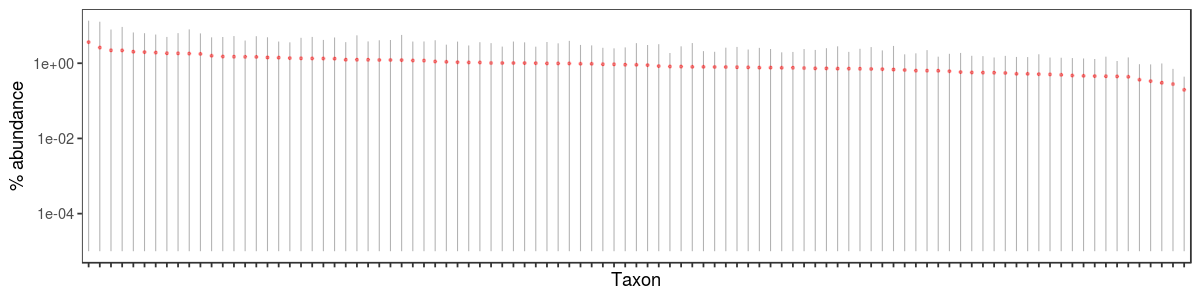

In [10]:
dims(10,2.5)
plot(p + scale_y_log10())

# Estimated coverage

* Coverage estimated with nonpareil

In [11]:
F = file.path(n100_r30_dir, 'coverage', 'nonpareil', 'all_summary.txt')
cov = read.delim(F, sep='\t')
cov %>% summary %>% print

     Sample            C                LR                modelR      
 Min.   : 1.00   Min.   :0.4833   Min.   :149354400   Min.   :0.9987  
 1st Qu.: 8.25   1st Qu.:0.5554   1st Qu.:149607075   1st Qu.:0.9994  
 Median :15.50   Median :0.6349   Median :149704425   Median :0.9996  
 Mean   :15.50   Mean   :0.6310   Mean   :149680020   Mean   :0.9995  
 3rd Qu.:22.75   3rd Qu.:0.6836   3rd Qu.:149779950   3rd Qu.:0.9997  
 Max.   :30.00   Max.   :0.8856   Max.   :149846550   Max.   :0.9998  
     LRstar            diversity    
 Min.   :2.306e+08   Min.   :16.21  
 1st Qu.:1.365e+09   1st Qu.:17.68  
 Median :1.968e+09   Median :17.92  
 Mean   :2.148e+09   Mean   :17.94  
 3rd Qu.:2.917e+09   3rd Qu.:18.32  
 Max.   :4.501e+09   Max.   :18.78  


# Feature tables

* feature tables for ML model training/testing

## n100_r30

In [12]:
feat_files = list.files(file.path(n100_r30_dir, 'map'), 'features.tsv.gz', full.names=TRUE, recursive=TRUE)
feat_files %>% length %>% print
feat_files %>% head

[1] 60


[1] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/map/1/megahit/features.tsv.gz"    
[2] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/map/1/metaspades/features.tsv.gz" 
[3] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/map/10/megahit/features.tsv.gz"   
[4] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/map/10/metaspades/features.tsv.gz"
[5] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/map/11/megahit/features.tsv.gz"   
[6] "/ebio/abt3_projects/databases_no-backup/DeepMAsED/test_runs//n100_r30/map/11/metaspades/features.tsv.gz"

In [13]:
feats = list()
for(F in feat_files){
    cmd = glue::glue('gunzip -c {F}', F=F)
    df = fread(cmd, sep='\t') %>%
        distinct(contig, assembler, Extensive_misassembly)
    df$Rep = basename(dirname(dirname(F)))
    feats[[F]] = df
}
feats = do.call(rbind, feats)
rownames(feats) = 1:nrow(feats)
feats %>% dfhead

[1] 542540      4


contig,assembler,Extensive_misassembly,Rep
k141_10002,megahit,,1
k141_10023,megahit,,1
k141_10026,megahit,,1


### Number of contigs

In [14]:
feats_s = feats %>%
    group_by(assembler, Rep) %>%
    summarize(n_contigs = n_distinct(contig)) %>%
    ungroup 

feats_s$n_contigs %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2055    6393    8917    9042   11414   16011 

### Misassembly types

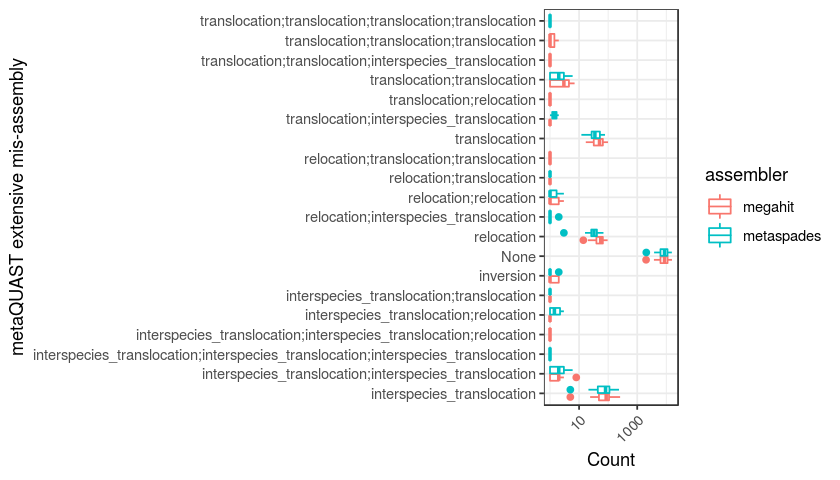

In [15]:
p = feats %>%
    mutate(Extensive_misassembly = ifelse(Extensive_misassembly == '', 'None',
                                          Extensive_misassembly)) %>%
    group_by(Extensive_misassembly, assembler, Rep) %>%
    summarize(n = n()) %>%
    ungroup() %>%
    ggplot(aes(Extensive_misassembly, n, color=assembler)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x='metaQUAST extensive mis-assembly', y='Count') +
    coord_flip() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

dims(7,4)
plot(p)

# sessionInfo

In [16]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] bindrcpp_0.2.2    data.table_1.11.4 ggplot2_3.0.0     tidyr_0.8.1      
[5] dplyr_0.7.6      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17     pillar_1.2.2     compiler_3.4.1   plyr_1.8.4      
 [5] bindr_0.1.1      base64enc_0.1-3  tools_3.4.1      digest_0.6.15   
 [9] uuid_0.1-2       jsonlite_1.5     evaluate_0.10.1  tibble_1.4.2    
[13] gtable_0.2.0     pkgconfig_2.0.1  rlang_0.2.1      IRdisplay_0.4.4 
[17] IRkernel_0.8.12  repr_0.15.0      withr_2.1.1      stringr_1.3.1   
[21] grid_3.4.1       tidyselec